### Contrastive Task

Populating the interactive namespace from numpy and matplotlib


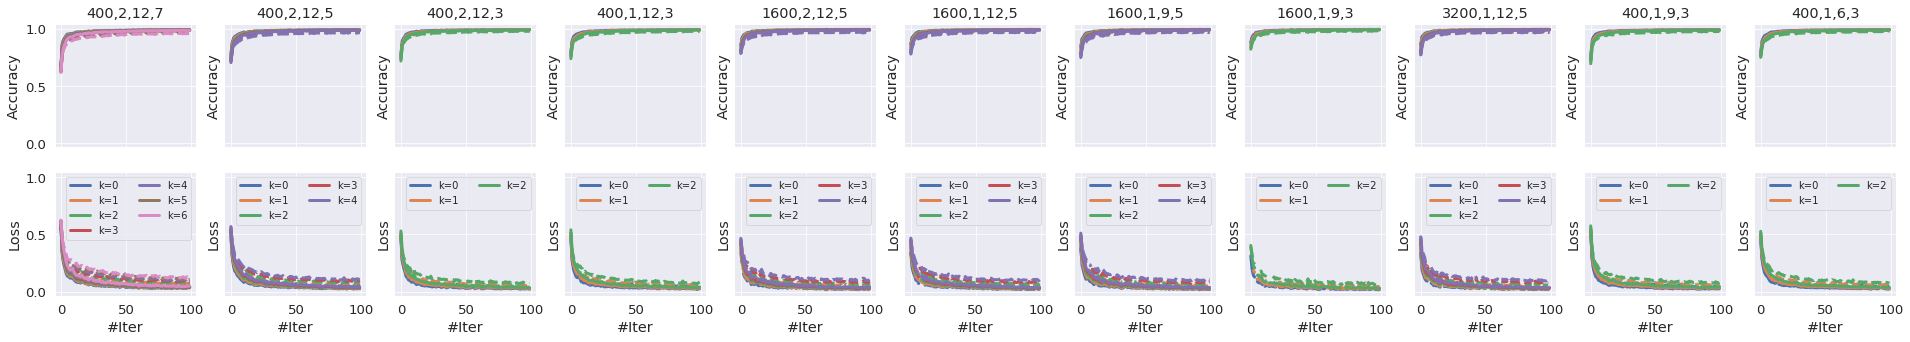

In [24]:
# plot results
%pylab inline
import os
import seaborn as sns
import pandas as pd


def exists_CPC_results(config):
    """Check if the result is exists.

    Example
    -------
    > configs = [(400, 2, 12, 7), (400, 2, 12, 5), (400, 2, 12, 3), (400, 1, 12, 3)]
    > configs = [config for config in configs if exists_CPC_results(config) is True]
    > print(configs)
    """
    g_enc_size, num_gru, L, K = config
    return os.path.exists('models/{}-{}/{}-{}-valid.csv'.format(g_enc_size, num_gru, L, K))

def get_CPC_results(config):
    g_enc_size, num_gru, L, K = config
    try:
        train_result = pd.read_csv('models/{}-{}/{}-{}-train.csv'.format(g_enc_size, num_gru, L, K))
        valid_result = pd.read_csv('models/{}-{}/{}-{}-valid.csv'.format(g_enc_size, num_gru, L, K))
        return train_result, valid_result
    except FileNotFoundError as e:
        print(e)
        return None
    

# loade dataset
configs = [(400, 2, 12, 7), (400, 2, 12, 5), (400, 2, 12, 3), (400, 1, 12, 3), (1600, 2, 12, 5), (1600, 1, 12, 5), (1600, 1, 9, 5), (1600, 1, 9, 3), (3200, 1, 12, 5), (400, 1, 9, 3), (400, 1, 6, 3), (400, 2, 9, 3), (400, 2, 6, 3),]
configs = [config for config in configs if exists_CPC_results(config) is True]


        
fig, axes = plt.subplots(2, len(configs), figsize=(len(configs)*3, 5), sharex=True, sharey=True)

for i, config in enumerate(configs):
    g_enc_size, num_gru, L, K = config
    train_result, valid_result = get_CPC_results(config)

    sns.set()
    sns.set_style("darkgrid")
    sns.set_context("paper", 1.5, {"lines.linewidth": 3})

    # Plot accuracy
    ax = axes[0, i]
    for k, color in zip(range(K), sns.color_palette()):
        ax.plot(train_result['accuracy-{}'.format(k)], c=color, label='k={}'.format(k))
        ax.plot(valid_result['accuracy-{}'.format(k)].values, '--', c=color, label=None)
    # ax.legend()
    # ax.set_xlabel('#Iter')
    ax.set_ylabel('Accuracy')
    ax.set_title('{},{},{},{}'.format(g_enc_size, num_gru, L, K))

    # Plot loss
    ax = axes[1, i]
    for k, color in zip(range(K), sns.color_palette()):
        ax.plot(train_result['loss-{}'.format(k)], c=color, label='k={}'.format(k))
        ax.plot(valid_result['loss-{}'.format(k)].values, '--', c=color, label=None)
    ax.legend(ncol=2, fontsize=10)

    ax.set_xlabel('#Iter')
    ax.set_ylabel('Loss')
    # ax.set_title('{},{}'.format(L, K))

* 若干汎化誤差がある
* 長期の予測ほど外れてる傾向にある
* コンテキストサイズは大きいほうが汎化誤差は小さくなりやすい
* GRUは2層積んだほうが精度良さそうな気配

### Label Prediction

Populating the interactive namespace from numpy and matplotlib
(400, 2, 12, 7) (True, False) 0.88109375 0.8329190340909091 0.7684375 0.8126821780663959 0.5237155924328059 0.4100155098715048
(400, 2, 12, 7) (False, False) 0.686796875 0.7790305397727273 0.750703125 0.4072975028753323 0.2980261230972935 0.2344893432303022
(400, 2, 12, 7) (False, True) 0.866171875 0.8225319602272727 0.777578125 0.7737911747711652 0.4969599050200446 0.4297513481919776
(400, 2, 12, 7) (True, True) 0.89078125 0.8253728693181818 0.758671875 0.8179956918146938 0.5154424404806994 0.41881525074942616
(400, 2, 12, 5) (True, False) 0.88921875 0.8335404829545454 0.783046875 0.8290056504174865 0.5301200896279212 0.4303498438222008
(400, 2, 12, 5) (False, False) 0.69953125 0.7757457386363636 0.7496875 0.4326895331790268 0.2864801521288732 0.2549119090893921
(400, 2, 12, 5) (False, True) 0.857890625 0.8168501420454546 0.768359375 0.7557554010217973 0.4905032620076625 0.39196329501595856
(400, 2, 12, 5) (True, True) 0.8

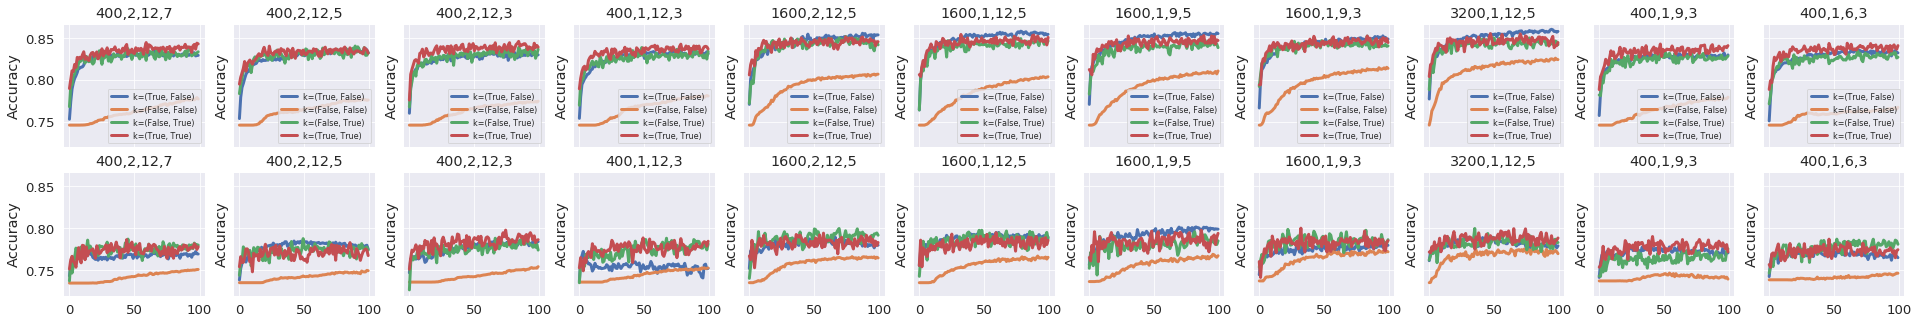

In [25]:
%pylab inline
import os
import seaborn as sns
import pandas as pd



def exists_CPC_label_results(config, pretrain, finetune_g):
    """Check if the result is exists.

    Example
    -------
    > configs = [(400, 2, 12, 7), (400, 2, 12, 5), (400, 2, 12, 3), (400, 1, 12, 3)]
    > configs = [config for config in configs if exists_CPC_results(config) is True]
    > print(configs)
    """
    g_enc_size, num_gru, L, K = config
    return os.path.exists('models/{}-{}/{}-{}/label_predict/{}-{}-test.csv'.format(g_enc_size, num_gru, L, K, pretrain, finetune_g))

def get_CPC_label_results(config, pretrain, finetune_g):
    g_enc_size, num_gru, L, K = config
    try:
        train_result = pd.read_csv('models/{}-{}/{}-{}/label_predict/{}-{}-train.csv'.format(g_enc_size, num_gru, L, K, pretrain, finetune_g))
        valid_result = pd.read_csv('models/{}-{}/{}-{}/label_predict/{}-{}-valid.csv'.format(g_enc_size, num_gru, L, K, pretrain, finetune_g))
        test_result = pd.read_csv('models/{}-{}/{}-{}/label_predict/{}-{}-test.csv'.format(g_enc_size, num_gru, L, K, pretrain, finetune_g))
        return train_result, valid_result, test_result
    except FileNotFoundError as e:
        print(e)
        return None
    
configs = [config for config in configs if exists_CPC_label_results(config, True, False) is True]

fig, axes = plt.subplots(2, len(configs), figsize=(len(configs)*3, 5), sharex=True, sharey=True)
sns.set()
sns.set_style("darkgrid")
sns.set_context("paper", 1.5, {"lines.linewidth": 3})

for i, config in enumerate(configs):
    label_predict_config = [(True, False), (False, False), (False, True), (True, True)]
    g_enc_size, num_gru, L, K = config
    ax = axes[0, i]  # accuracy
    for (pretrain, finetune_g), color in zip(label_predict_config, sns.color_palette()):
        results = get_CPC_label_results(config, pretrain, finetune_g)
        if results is None:
            continue
        train_result, valid_result, test_result = results
        ax.plot(valid_result['accuracy'], c=color, label='k={}'.format((pretrain, finetune_g)))
        # ax.plot(test_result['accuracy'].values, '--', c=color, label=None)
    ax.legend(fontsize=8, loc=4)
    # ax.set_xlabel('#Iter')
    ax.set_ylabel('Accuracy')
    ax.set_title('{},{},{},{}'.format(g_enc_size, num_gru, L, K))

    ax = axes[1, i]  # F1
    for (pretrain, finetune_g), color in zip(label_predict_config, sns.color_palette()):
        results = get_CPC_label_results(config, pretrain, finetune_g)
        if results is None:
            continue
        train_result, valid_result, test_result = results
        ax.plot(test_result['accuracy'], c=color, label='k={}'.format((pretrain, finetune_g)))
        # ax.plot(valid_result['f1macro'], c=color, label='k={}'.format((pretrain, finetune_g)))
        # ax.plot(test_result['f1macro'].values, '--', c=color, label=None)
        idx = valid_result['loss'].idxmin()
        print(config, (pretrain, finetune_g), train_result['accuracy'][idx], valid_result['accuracy'][idx], test_result['accuracy'][idx], train_result['f1macro'][idx], valid_result['f1macro'][idx], test_result['f1macro'][idx])
    
    # ax.legend(fontsize=8, loc=4)
    # ax.set_xlabel('#Iter')
    ax.set_ylabel('Accuracy')
    ax.set_title('{},{},{},{}'.format(g_enc_size, num_gru, L, K))


In [22]:
idx = valid_result['loss'].idxmin()
config, (pretrain, finetune_g), train_result['accuracy'][idx], valid_result['accuracy'][idx], test_result['accuracy'][idx]

((400, 2, 6, 3), (True, True), 0.955078125, 0.948974609375, 0.812578125)

* 全体的な傾向として、Random特徴 <<< CPC事前学習、最終層のみ再学習 <<< 全体を教師あり学習 <= CPCで事前学習、全体を再学習
* 精度に寄与しているのはほとんどLatent Sizeのみ（Latent Sizeを4倍にすると、CPCの事前学習は精度5ポイントぐらい改善、全教師ありは特に改善なし
* 再学習しない場合にもg_encでDropoutが適用されているというバグがある上での結果（あとで気づいた、修正済み） => テストデータの精度はそんなに変わらなそう、検証データの精度は高くなる
  * また、単なる全結合でなく多層ネットを上にくっつけた場合（CPC論文と同様の設定）、検証データの精度は95%とか出るので、情報がg_encの出力に全く入ってないということはなさそう（ただし、ドメイン汎化性能についてはそんなに改善が見られなかった）
* また、g_encだけでなくc_enc (ARモデル）も利用した場合、再学習する場合は全体的に精度改善が見られたが、再学習しない場合はむしろ悪化するか同じくらい（情報量減る方向に偏るから？）

### Load weights

In [2]:
# prepare datasets

from datasets import OppG
import torch.utils.data as data
from utils import split_dataset

K = 5 # maximum prediction steps (sequence length of future sequences)
L = 12  # context size
num_batch = 10000  # the number of batch size to train
monitor_each = 100  # output the result per monitor_each iterations

print("Load datasets ...")
dataset_joint = OppG('S2,S3,S4', 'Gestures', l_sample=30, interval=15, T=K+L)
train_dataset_joint, valid_dataset_joint = split_dataset(dataset_joint)
train_loader_joint = data.DataLoader(dataset_joint, batch_size=128, shuffle=True)
valid_loader_joint = data.DataLoader(dataset_joint, batch_size=128, shuffle=False)

# marginal sample come from same datasets for simplicity
# Same train-valid split with joint dataset
dataset_marginal = OppG('S2,S3,S4', 'Gestures', l_sample=30, interval=15, T=K)
train_dataset_marginal, valid_dataset_marginal = split_dataset(dataset_marginal)
train_loader_marginal = data.DataLoader(dataset_marginal, batch_size=128, shuffle=True)
valid_loader_marginal = data.DataLoader(dataset_marginal, batch_size=128, shuffle=False)

# Test dataset for label prediction
test_dataset = OppG('S1', 'Gestures', l_sample=30, interval=15, T=K+L)

Load datasets ...


In [1]:

# prepare datasets

from datasets import OppG
import torch.utils.data as data
from utils import split_dataset

K = 5 # maximum prediction steps (sequence length of future sequences)
L = 12  # context size
num_batch = 10000  # the number of batch size to train
monitor_each = 100  # output the result per monitor_each iterations

print("Load datasets ...")
dataset_joint = OppG('S2,S3,S4', 'Gestures', l_sample=30, interval=15, T=K+L)


Load datasets ...


In [17]:
train = OppG('S2,S3,S4', 'Gestures', l_sample=30, interval=15, T=K+L, adl_ids=['Drill', 'ADL1', 'ADL2', 'ADL3'])
valid = OppG('S2,S3,S4', 'Gestures', l_sample=30, interval=15, T=K+L, adl_ids=['ADL4', 'ADL5'])


In [18]:
len(train), len(valid)

(30564, 11310)

In [15]:
train_datasets = []
valid_datasets = []
for dataset in dataset_joint.datasets:
    for sub_dataset in dataset.datasets:
        if sub_dataset.adl_id in ['ADL4', 'ADL5']:
            valid_datasets.append(sub_dataset)
        else:
            train_datasets.append(sub_dataset)
dataset_joint.datasets[0].datasets[0]

In [16]:
valid_datasets

[]

In [9]:
OppG(datasets=train_datasets)

TypeError: __init__() missing 1 required positional argument: 'domain_keys'

In [13]:
OppG(domain_keys=dataset_joint.domain_keys, datasets=train_datasets, **dataset_joint.domain_specific_params())

In [9]:
from torch import nn
from torch import optim
import torch
from opportunity import Encoder, ContextEncoder, Predictor
from main import CPCModel, get_context
from collections import OrderedDict
from sklearn import metrics


class Classifier(nn.Module):
    def __init__(self, num_classes, g_enc, c_enc=None, finetune_g=False, finetune_c=False, hiddens=None):
        super(Classifier, self).__init__()
        if hiddens is None:
            hiddens = []
        assert isinstance(hiddens, list), "variable hiddens must be a list type object"
        self.g_enc = g_enc
        self.c_enc = c_enc
        self.finetune_g = finetune_g
        self.finetune_c = finetune_c
        self.num_classes = num_classes
        
        if c_enc is None:
            input_size = g_enc.output_shape()[1]
        else:
            input_size = c_enc.hidden_size
            
        layers = []
        for i in hiddens:
            layers.append(nn.Linear(input_size, i))
            layers.append(nn.ReLU(True))
            layers.append(nn.Dropout(0.5))
            input_size = i
        layers.append(nn.Linear(input_size, num_classes))
        layers.append(nn.LogSoftmax(dim=-1))

        self.classifier = nn.Sequential(*layers)

    def forward(self, X):
        if not self.finetune_g:
            self.g_enc.eval()  # It is necesaryy to deactivate dropout
            
        if self.c_enc is None:
            z = self.g_enc(X[..., -1])
            y_pred = self.classifier(z)
        else:
            # if not self.finetune_c:
            #     self.c_enc.eval()
            c = get_context(X, self.g_enc, self.c_enc)
            y_pred = self.classifier(c)
            # self.c_enc.train()
        self.g_enc.train()
        return y_pred
    def parameters(self):
        parameters = list(self.classifier.parameters())
        if self.finetune_g:
            parameters += self.g_enc.parameters()
        if self.finetune_c:
            parameters += self.c_enc.parameters()
        return parameters

    
def validate_label_prediction(classifier, dataset, batch_size=128, nb_batch=None):
    loader = data.DataLoader(dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    if nb_batch is None:
        nb_batch = len(loader)
    
    classifier.eval()
    ys = []
    pred_ys = []
    loss = 0
    criterion = nn.NLLLoss()
    for batch_idx, (X, Y) in enumerate(loader):
        y = Y[:, 0, L-1].long().cuda()
        pred_y = classifier(X[..., :L].float().cuda())        
        loss += criterion(pred_y, y).item()
        ys.append(y.cpu().numpy())
        pred_y = np.argmax(pred_y.detach().cpu().numpy(), axis=1)
        pred_ys.append(pred_y)
        
        if (batch_idx + 1) == nb_batch:
            break
    loss /= (batch_idx+1)

    y = np.concatenate(ys)
    pred_y = np.concatenate(pred_ys)

    classifier.train()
    result = OrderedDict()
    result['accuracy'] = metrics.accuracy_score(y, pred_y)
    result['f1macro'] = metrics.f1_score(y, pred_y, average='macro')
    result['loss'] = loss
    
    return result

### GRUを使う場合

In [100]:
# Parameters
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""
pretrain = True  # wheter use a weight pretrained by CPC or not
finetune_g = True  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 1600
context_size = g_enc_size / 2
num_gru = 1

# parameter of label train
monitor_per = 100
num_iter = 3000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}-{}/{}-{}-{}.pth'.format(g_enc_size, num_gru, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, c_enc=c_enc, finetune_g=finetune_g, finetune_c=finetune_g).cuda()
# optimizer = optim.Adam(classifier.parameters(), lr=0.001)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()



train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, L-1].long().cuda()
    pred_y = classifier(X[..., :L].float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    print(num_iter+1)
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print('train', train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print('valid', valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print('test', test_results[-1])
# pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
# pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
# d.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

100
train OrderedDict([('accuracy', 0.861796875), ('f1macro', 0.7004305623581465), ('loss', 0.4381886124610901)])
valid OrderedDict([('accuracy', 0.845703125), ('f1macro', 0.6674887319812384), ('loss', 0.47210582811385393)])
test OrderedDict([('accuracy', 0.789375), ('f1macro', 0.47557651957450314), ('loss', 0.6238884890079498)])
200
train OrderedDict([('accuracy', 0.900546875), ('f1macro', 0.7936803535434589), ('loss', 0.298756520152092)])
valid OrderedDict([('accuracy', 0.887939453125), ('f1macro', 0.7750209152019797), ('loss', 0.33348608668893576)])
test OrderedDict([('accuracy', 0.81578125), ('f1macro', 0.5384210805459989), ('loss', 0.5622363173216581)])
300
train OrderedDict([('accuracy', 0.925546875), ('f1macro', 0.8445755821560231), ('loss', 0.21955824837088586)])
valid OrderedDict([('accuracy', 0.919189453125), ('f1macro', 0.8327061788619954), ('loss', 0.24124833336099982)])
test OrderedDict([('accuracy', 0.828984375), ('f1macro', 0.603899464975494), ('loss', 0.4943942452594638

KeyboardInterrupt: 

In [7]:
# Parameters
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""
pretrain = False  # wheter use a weight pretrained by CPC or not
finetune_g = True  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 1600
context_size = g_enc_size / 2
num_gru = 1

# parameter of label train
monitor_per = 100
num_iter = 3000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}-{}/{}-{}-{}.pth'.format(g_enc_size, num_gru, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, c_enc=c_enc, finetune_g=finetune_g, finetune_c=finetune_g).cuda()
# optimizer = optim.Adam(classifier.parameters(), lr=0.001)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()



train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, L-1].long().cuda()
    pred_y = classifier(X[..., :L].float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    print(num_iter+1)
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print('train', train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print('valid', valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print('test', test_results[-1])
# pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
# pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
# d.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

100
train OrderedDict([('accuracy', 0.8209375), ('f1macro', 0.5995868798881706), ('loss', 0.5428894957900048)])
valid OrderedDict([('accuracy', 0.806396484375), ('f1macro', 0.5763258197322467), ('loss', 0.5829815184697509)])
test OrderedDict([('accuracy', 0.7903125), ('f1macro', 0.4237191095765309), ('loss', 0.6869377682358027)])
200
train OrderedDict([('accuracy', 0.87671875), ('f1macro', 0.7648287719123409), ('loss', 0.3689137676358223)])
valid OrderedDict([('accuracy', 0.864501953125), ('f1macro', 0.744293069775259), ('loss', 0.4030879847705364)])
test OrderedDict([('accuracy', 0.80421875), ('f1macro', 0.5175644910892929), ('loss', 0.5930553464218974)])
300
train OrderedDict([('accuracy', 0.899765625), ('f1macro', 0.8064781105992399), ('loss', 0.29512077376246454)])
valid OrderedDict([('accuracy', 0.8935546875), ('f1macro', 0.8069186935370225), ('loss', 0.31841588905081153)])
test OrderedDict([('accuracy', 0.81953125), ('f1macro', 0.5572801139042354), ('loss', 0.5684108949452639)])


KeyboardInterrupt: 

In [10]:
# Parameters
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""
pretrain = True  # wheter use a weight pretrained by CPC or not
finetune_g = False  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 1600
context_size = g_enc_size / 2
num_gru = 1

# parameter of label train
monitor_per = 100
num_iter = 3000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}-{}/{}-{}-{}.pth'.format(g_enc_size, num_gru, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, c_enc=c_enc, finetune_g=finetune_g, finetune_c=finetune_g, hiddens=[400]).cuda()
# optimizer = optim.Adam(classifier.parameters(), lr=0.001)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()

train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, L-1].long().cuda()
    pred_y = classifier(X[..., :L].float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    print(num_iter+1)
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print('train', train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print('valid', valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print('test', test_results[-1])
# pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
# pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
# d.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

100


/root/.pyenv/versions/3.6.3/envs/pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train OrderedDict([('accuracy', 0.7678125), ('f1macro', 0.4471904559718129), ('loss', 0.7223688900470734)])
valid OrderedDict([('accuracy', 0.755615234375), ('f1macro', 0.42632538951872206), ('loss', 0.7502346020191908)])
test OrderedDict([('accuracy', 0.7509375), ('f1macro', 0.32201808402295773), ('loss', 0.8535763876885176)])
200
train OrderedDict([('accuracy', 0.8065625), ('f1macro', 0.5725759067530151), ('loss', 0.5665743789076805)])
valid OrderedDict([('accuracy', 0.8017578125), ('f1macro', 0.5791731901048173), ('loss', 0.5950355753302574)])
test OrderedDict([('accuracy', 0.77234375), ('f1macro', 0.3944280507200679), ('loss', 0.716947384364903)])
300
train OrderedDict([('accuracy', 0.823671875), ('f1macro', 0.592987463689468), ('loss', 0.5035033494234085)])
valid OrderedDict([('accuracy', 0.809814453125), ('f1macro', 0.5685044698353635), ('loss', 0.5378511063754559)])
test OrderedDict([('accuracy', 0.77234375), ('f1macro', 0.39669270577767723), ('loss', 0.676087892204523)])
400
tr

In [159]:
# Parameters
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""
pretrain = False  # wheter use a weight pretrained by CPC or not
finetune_g = False  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 1600
context_size = g_enc_size / 2
num_gru = 1

# parameter of label train
monitor_per = 100
num_iter = 3000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    
    model.load_state_dict(torch.load('models/{}-{}/{}-{}-{}.pth'.format(g_enc_size, num_gru, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, c_enc=c_enc, finetune_g=finetune_g, finetune_c=finetune_g).cuda()
# optimizer = optim.Adam(classifier.parameters(), lr=0.001)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()



train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, L-1].long().cuda()
    pred_y = classifier(X[..., :L].float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    print(num_iter+1)
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print('train', train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print('valid', valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print('test', test_results[-1])
# pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
# pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
# d.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

RuntimeError: CUDA out of memory. Tried to allocate 71.75 MiB (GPU 0; 31.74 GiB total capacity; 30.13 GiB already allocated; 64.81 MiB free; 323.83 MiB cached)

### GRUを使わない場合

In [11]:

# Parameters
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""
pretrain = True  # wheter use a weight pretrained by CPC or not
finetune_g = False  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 1600
context_size = g_enc_size / 2
num_gru = 1

# parameter of label train
monitor_per = 100
num_iter = 30000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}-{}/{}-{}-{}.pth'.format(g_enc_size, num_gru, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, finetune_g=finetune_g, hiddens=[400]).cuda()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()
print(classifier)

train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, L-1].long().cuda()
    pred_y = classifier(X[..., :L].float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    print(num_iter+1)
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print('train', train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print('valid', valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print('test', test_results[-1])
# pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
# pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
# d.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

Classifier(
  (g_enc): Encoder(
    (feature): Sequential(
      (0): Conv2d(1, 50, kernel_size=(1, 5), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(50, 40, kernel_size=(1, 5), stride=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(40, 20, kernel_size=(1, 3), stride=(1, 1))
      (7): ReLU()
      (8): Dropout(p=0.5)
      (9): Flatten()
      (10): Linear(in_features=4520, out_features=1600, bias=True)
      (11): ReLU()
      (12): Dropout(p=0.5)
    )
  )
  (classifier): Sequential(
    (0): Linear(in_features=1600, out_features=400, bias=True)
    (1): ReLU(inplace)
    (2): Dropout(p=0.5)
    (3): Linear(in_features=400, out_features=18, bias=True)
    (4): LogSoftmax()
  )
)
100
train OrderedDict([('accuracy', 0.8025), ('f1macro', 0.5380620464123538), ('loss', 0.6128845980763435)])
valid O

KeyboardInterrupt: 

In [158]:

# Parameters
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""
pretrain = True  # wheter use a weight pretrained by CPC or not
finetune_g = False  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 1600
context_size = g_enc_size / 2
num_gru = 1

# parameter of label train
monitor_per = 100
num_iter = 30000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}-{}/{}-{}-{}.pth'.format(g_enc_size, num_gru, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, finetune_g=finetune_g, hiddens=None).cuda()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()
print(classifier)

train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, L-1].long().cuda()
    pred_y = classifier(X[..., :L].float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    print(num_iter+1)
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print('train', train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print('valid', valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print('test', test_results[-1])
# pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
# pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
# d.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

Classifier(
  (g_enc): Encoder(
    (feature): Sequential(
      (0): Conv2d(1, 50, kernel_size=(1, 5), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(50, 40, kernel_size=(1, 5), stride=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(40, 20, kernel_size=(1, 3), stride=(1, 1))
      (7): ReLU()
      (8): Dropout(p=0.5)
      (9): Flatten()
      (10): Linear(in_features=4520, out_features=1600, bias=True)
      (11): ReLU()
      (12): Dropout(p=0.5)
    )
  )
  (classifier): Sequential(
    (0): Linear(in_features=1600, out_features=18, bias=True)
    (1): LogSoftmax()
  )
)
100
train OrderedDict([('accuracy', 0.71265625), ('f1macro', 0.24054137804153852), ('loss', 0.8732431977987289)])
valid OrderedDict([('accuracy', 0.697265625), ('f1macro', 0.22823489694915594), ('loss', 0.8962474148720503)])


KeyboardInterrupt: 

In [132]:
classifier

Classifier(
  (g_enc): Encoder(
    (feature): Sequential(
      (0): Conv2d(1, 50, kernel_size=(1, 5), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(50, 40, kernel_size=(1, 5), stride=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(40, 20, kernel_size=(1, 3), stride=(1, 1))
      (7): ReLU()
      (8): Dropout(p=0.5)
      (9): Flatten()
      (10): Linear(in_features=4520, out_features=400, bias=True)
      (11): ReLU()
      (12): Dropout(p=0.5)
    )
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=400, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=400, out_features=18, bias=True)
    (3): LogSoftmax()
  )
)

In [65]:
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""

pretrain = False  # wheter use a weight pretrained by CPC or not
finetune_g = False  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 400
context_size = g_enc_size / 2
num_gru = 2

# parameter of label train
monitor_per = 100
num_iter = 1000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}/{}-{}-{}.pth'.format(g_enc_size, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, finetune_g=finetune_g).cuda()
# optimizer = optim.Adam(classifier.parameters(), lr=0.001)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()


train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, 0].long().cuda()
    pred_y = classifier(X.float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print(train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print(valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print(test_results[-1])
pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
pd.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

2.001230239868164
OrderedDict([('accuracy', 0.6371875), ('f1macro', 0.043244045725435304), ('loss', 1.949566799402237)])
OrderedDict([('accuracy', 0.633544921875), ('f1macro', 0.043092711602650324), ('loss', 1.946874015033245)])
OrderedDict([('accuracy', 0.7365625), ('f1macro', 0.04712774678583568), ('loss', 1.7967038476467132)])
1.3937158584594727
OrderedDict([('accuracy', 0.6371875), ('f1macro', 0.043244045725435304), ('loss', 1.7270566630363464)])
OrderedDict([('accuracy', 0.633544921875), ('f1macro', 0.043092711602650324), ('loss', 1.7258366271853447)])
OrderedDict([('accuracy', 0.7365625), ('f1macro', 0.04712774678583568), ('loss', 1.518791462779045)])
1.2042549848556519
OrderedDict([('accuracy', 0.6371875), ('f1macro', 0.043244045725435304), ('loss', 1.6696771585941315)])
OrderedDict([('accuracy', 0.633544921875), ('f1macro', 0.043092711602650324), ('loss', 1.669043567031622)])
OrderedDict([('accuracy', 0.7365625), ('f1macro', 0.04712774678583568), ('loss', 1.4496540543437004)])


NameError: name 'classifier' is not defined

In [77]:
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""

pretrain = True  # wheter use a weight pretrained by CPC or not
finetune_g = False  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 400
context_size = g_enc_size / 2
num_gru = 2

# parameter of label train
monitor_per = 100
num_iter = 1000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}/{}-{}-{}.pth'.format(g_enc_size, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, finetune_g=finetune_g).cuda()
# optimizer = optim.Adam(classifier.parameters(), lr=0.001)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()


train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, 0].long().cuda()
    pred_y = classifier(X.float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print(train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print(valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print(test_results[-1])
pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
pd.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

OrderedDict([('accuracy', 0.664921875), ('f1macro', 0.07821194759438099), ('loss', 1.0619485074281692)])
OrderedDict([('accuracy', 0.66162109375), ('f1macro', 0.08134553838557129), ('loss', 1.0744211468845606)])
OrderedDict([('accuracy', 0.7425), ('f1macro', 0.0629227177377203), ('loss', 1.001254670470953)])
OrderedDict([('accuracy', 0.7303125), ('f1macro', 0.32435484868394227), ('loss', 0.853039703965187)])
OrderedDict([('accuracy', 0.723876953125), ('f1macro', 0.3129451830718002), ('loss', 0.8654680401086807)])
OrderedDict([('accuracy', 0.75671875), ('f1macro', 0.19644833477777024), ('loss', 0.8671647137403489)])
OrderedDict([('accuracy', 0.75578125), ('f1macro', 0.41961436968539195), ('loss', 0.7583715736865997)])
OrderedDict([('accuracy', 0.751953125), ('f1macro', 0.42718534389685586), ('loss', 0.7730515468865633)])
OrderedDict([('accuracy', 0.7675), ('f1macro', 0.2976349830694086), ('loss', 0.8033436811715364)])
OrderedDict([('accuracy', 0.77328125), ('f1macro', 0.477647139044618)

In [ ]:
"""
Case1: pretrain=True and finetune_g=False
=> Shallow classifier over unsupervisly learned representations

Case2: pretrain=False and finetune_g=True
=> Fully supervised learning 

Case3: pretrain=True and finetune_g=True
=> Unsup+Sup learning

Case4: pretrain=False and finetune_g=False
=> Baseline with random representations (to clarify the effect of CPC, not an architecture)
"""

pretrain = True  # wheter use a weight pretrained by CPC or not
finetune_g = True  # wheter finetune a g_encoder during the supervised training

# parameter for models
g_enc_size = 400
context_size = g_enc_size / 2
num_gru = 2

# parameter of label train
monitor_per = 100
num_iter = 50000

g_enc = Encoder(input_shape=dataset_joint.get('input_shape'), hidden_size=g_enc_size).cuda()
c_enc = ContextEncoder(input_shape=g_enc.output_shape(), num_layers=num_gru, hidden_size=context_size).cuda()
predictor = Predictor((None, c_enc.hidden_size), g_enc.output_shape()[1], max_steps=K).cuda()
model = CPCModel(g_enc, c_enc, predictor).cuda()

if pretrain:
    model.load_state_dict(torch.load('models/{}/{}-{}-{}.pth'.format(g_enc_size, L, K, 10000)))

classifier = Classifier(num_classes=dataset_joint.get('num_classes'), g_enc=g_enc, finetune_g=finetune_g).cuda()
# optimizer = optim.Adam(classifier.parameters(), lr=0.001)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()


train_results = []
valid_results = []
test_results = []
for num_iter in range(num_iter):
    optimizer.zero_grad()
    X, Y = train_loader_joint.__iter__().__next__()
    y = Y[:, 0, 0].long().cuda()
    pred_y = classifier(X.float().cuda())
    loss = criterion(pred_y, y)
    loss.backward()
    optimizer.step()
    
    if ((num_iter + 1) % monitor_per) != 0:
        continue
    print(loss.item())
    train_results.append(validate_label_prediction(classifier, train_dataset_joint, nb_batch=100))
    print(train_results[-1])
    valid_results.append(validate_label_prediction(classifier, valid_dataset_joint, nb_batch=100))
    print(valid_results[-1])
    test_results.append(validate_label_prediction(classifier, test_dataset, nb_batch=100))
    print(test_results[-1])
pd.DataFrame(train_results).to_csv(os.path.join(folder_name, '{}-{}-train.csv'.format(pretrain, finetune_g)))
pd.DataFrame(valid_results).to_csv(os.path.join(folder_name, '{}-{}-valid.csv'.format(pretrain, finetune_g)))
pd.DataFrame(test_results).to_csv(os.path.join(folder_name, '{}-{}-test.csv'.format(pretrain, finetune_g)))

0.5619197487831116
OrderedDict([('accuracy', 0.822265625), ('f1macro', 0.6196965851229312), ('loss', 0.551879645884037)])
OrderedDict([('accuracy', 0.807861328125), ('f1macro', 0.571609096475301), ('loss', 0.5761916963383555)])
OrderedDict([('accuracy', 0.790390625), ('f1macro', 0.41197512668803027), ('loss', 0.6471865653805434)])
0.5141294598579407
OrderedDict([('accuracy', 0.858046875), ('f1macro', 0.7054237737506454), ('loss', 0.43582028478384016)])
OrderedDict([('accuracy', 0.852783203125), ('f1macro', 0.7018967414030892), ('loss', 0.46280600037425756)])
OrderedDict([('accuracy', 0.792890625), ('f1macro', 0.41725817135561566), ('loss', 0.6020426515303552)])
0.5007063150405884
OrderedDict([('accuracy', 0.86765625), ('f1macro', 0.7400732510240486), ('loss', 0.3863221827149391)])
OrderedDict([('accuracy', 0.858642578125), ('f1macro', 0.7169083770160775), ('loss', 0.4108772771432996)])
OrderedDict([('accuracy', 0.79625), ('f1macro', 0.44953118288915356), ('loss', 0.6640124198980629)])


In [83]:
folder_name

'./models/100/12-3/label_classification'